In [689]:
from tslearn.preprocessing import TimeSeriesScalerMeanVariance
from tslearn.early_classification import NonMyopicEarlyClassifier
from tslearn.datasets import UCR_UEA_datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib notebook

In [715]:
data_path = '..\data\processed\data_clustering[DataMining].csv'
df_data = pd.read_csv(data_path)
df_data['ts'] = pd.to_datetime(df_data['ts'])
df_data = df_data.set_index('ts')

In [716]:
df_train = df_data[df_data.index.year != 2020].copy()
df_test = df_data[df_data.index.year == 2020].copy()

In [ ]:
df_test[df_test.cluster == 0].iloc[:,:-1].T.plot(legend=False,color='red',alpha=0.05)
df_test[df_test.cluster == 1].iloc[:,:-1].T.plot(legend=False,color='blue',alpha=0.05)

In [717]:
X_train = df_train.iloc[:,:-1].values
y_train = df_train.iloc[:,-1].values
print('Train: ',X_train.shape)
X_test = df_test.iloc[:,:-1].values
y_test = df_test.iloc[:,-1].values
print('Test: ',X_test.shape)

Train:  (730, 24)
Test:  (152, 24)


<IPython.core.display.Javascript object>


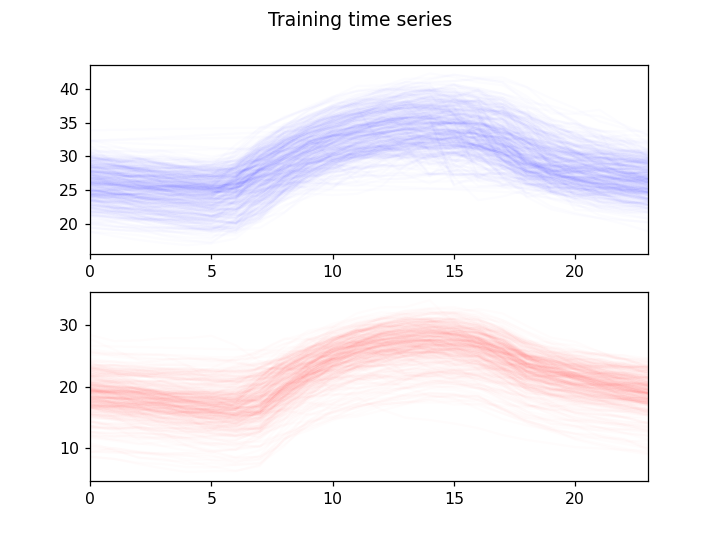

In [718]:
np.random.seed(0)
#X_train_ts = TimeSeriesScalerMeanVariance().fit_transform(X_train)
#X_test_ts = TimeSeriesScalerMeanVariance().fit_transform(X_test)

size = X_train.shape[1]
n_classes = len(set(y_train))

color_list = ['blue','red','green','orange','yellow','black','purple','skyblue','cyan','brown']
plt.figure()
for i, cl in enumerate(set(y_train)):
    plt.subplot(n_classes, 1, i + 1)
    for ts in X_train[y_train == cl]:
        plt.plot(ts.ravel(), color=color_list[cl], alpha=.01)
    plt.xlim(0, size - 1)
plt.suptitle("Training time series")
plt.show()

In [719]:
sc1 = StandardScaler()
X_train = sc1.fit_transform(X_train)
X_train = X_train.reshape(X_train.shape[0],X_train.shape[1],1)
sc2 = StandardScaler() 
X_test = sc2.fit_transform(X_test)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1],1)

In [720]:
early_clf = NonMyopicEarlyClassifier(n_clusters=3,
                                     cost_time_parameter=5e-2,
                                     lamb=1,
                                     random_state=0)
# 0.01 - 0.1

early_clf.fit(X_train, y_train)

print('early_classification_cost: ',early_clf.early_classification_cost(X_train, y_train))

preds, times = early_clf.predict_class_and_earliness(X_test)


print("Correct classification rate:", early_clf.score(X_test, y_test))
print('Times prediction: ',np.unique(times))

early_classification_cost:  0.6326027397260273
Correct classification rate: 0.9013157894736842
Times prediction:  [12]


In [721]:
X_test = sc2.inverse_transform(X_test[:,:,0])

In [733]:
def plot_partial(time_series, t, y_true=0, y_pred=0, color="k"):
    plt.plot(time_series[:t+1].ravel(), color=color, linewidth=1.5,alpha=0.5)
    plt.plot(numpy.arange(t, time_series.shape[0]),
             time_series[t:].ravel(), color=color, linewidth=1.5,alpha=0.1)
    plt.axvline(x=t, color='black', linewidth=1,linestyle="dashed")
    #plt.title("Sample of class {} predicted as class {}".format(y_true, y_pred))


<IPython.core.display.Javascript object>


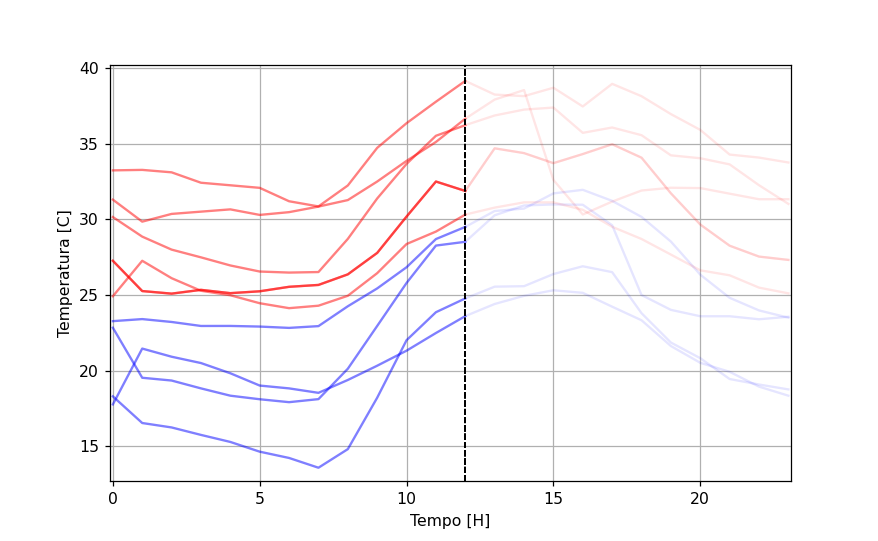

In [759]:
plt.figure()
import random as rd
for i in range(10):
    ts_idx = rd.randint(0,X_test.shape[0]-1)
    t = times[ts_idx]
    if(preds[ts_idx]==0):
        plot_partial(X_test[ts_idx], t, y_test[ts_idx], preds[ts_idx], color="red")
    else:
        plot_partial(X_test[ts_idx], t, y_test[ts_idx], preds[ts_idx], color="blue")
plt.xlabel('Tempo [H]')
plt.ylabel('Temperatura [C]')
plt.grid(True)
plt.show()

In [752]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
confusion_matrix(y_test, preds)

array([[80, 14],
       [ 1, 57]], dtype=int64)